# SHAP Classification Example 1

In [2]:
import shap
from sklearn.model_selection import train_test_split

X, y = shap.datasets.adult()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression 
import numpy as np

In [4]:
cats = ['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
nums = ['Age', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week']

In [5]:
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(), cats),
        ('num', StandardScaler(), nums)
    ])

In [6]:
# Define the pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

In [7]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Workclass',
                                                   'Marital Status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Education-Num',
                                                   'Capital Gain',
                                                   'Capital Loss',
                                                   'Hours per week'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [8]:
X_sub = shap.sample(X_train, 100)

In [9]:
ex = shap.Explainer(model.predict_proba, X_sub)
shap_values = ex(X_test.iloc[0:100])

PermutationExplainer explainer: 101it [00:11,  1.48it/s]                                                               


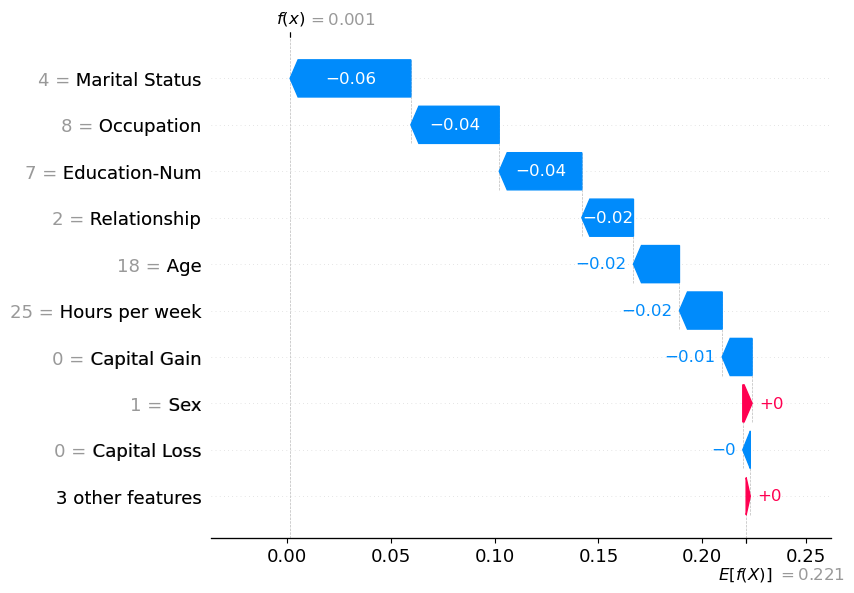

In [10]:
class_index=1
data_index=1
shap.plots.waterfall(shap_values[data_index,:,class_index])

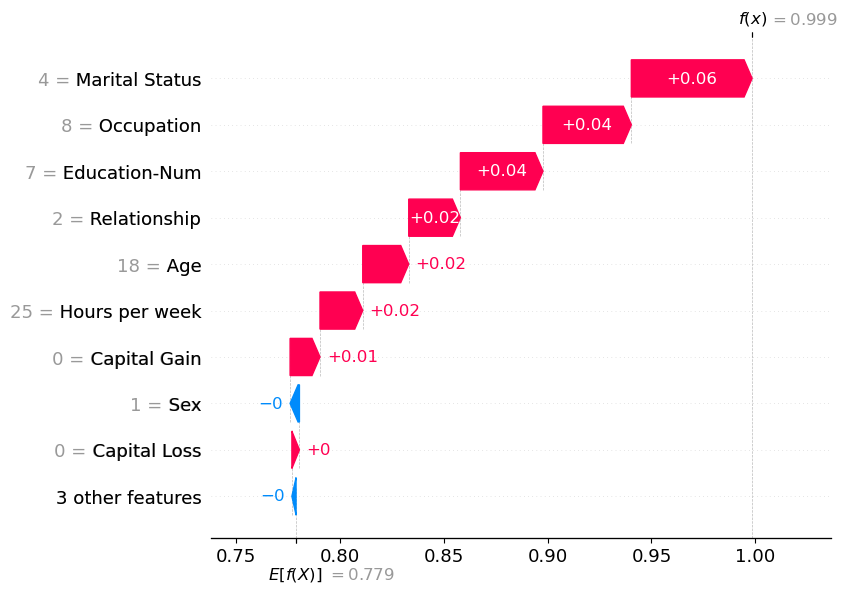

In [11]:
class_index=0
shap.plots.waterfall(shap_values[data_index,:,class_index])

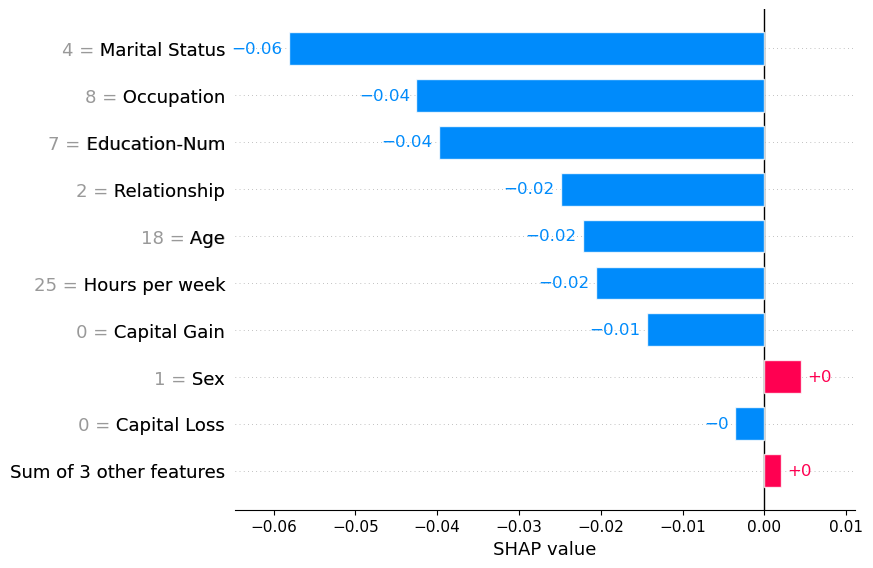

In [23]:
class_index=1
shap.plots.bar(shap_values[data_index,:,class_index])

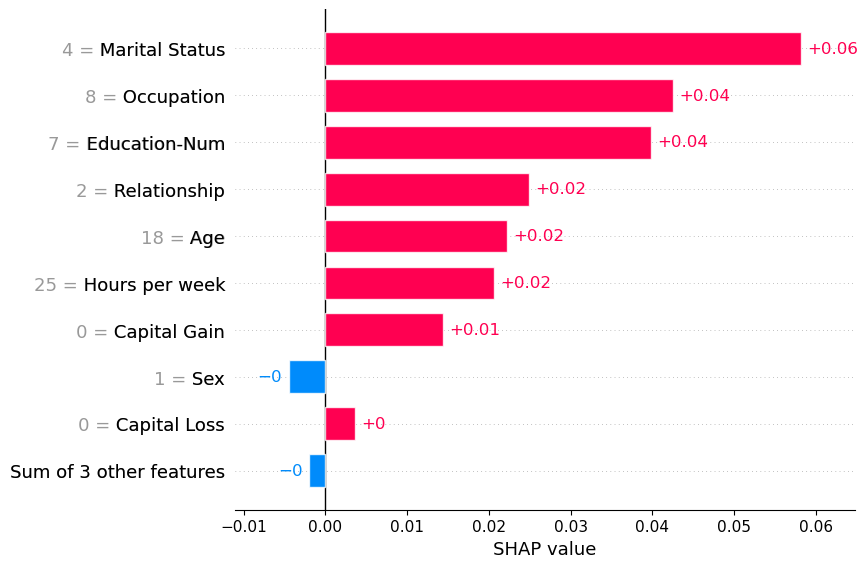

In [31]:
class_index=0
shap.plots.bar(shap_values[data_index,:,class_index])

In [37]:
shap.initjs()
class_index=1
shap.plots.force(shap_values[data_index,:,class_index])

In [39]:
shap.initjs()
class_index=0
shap.plots.force(shap_values[data_index,:,class_index])

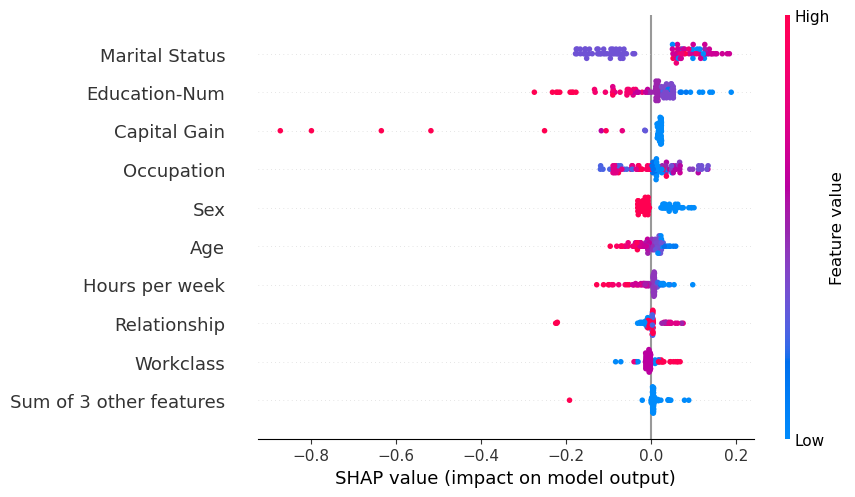

In [41]:
class_index=0
shap.plots.beeswarm(shap_values[:,:,class_index])

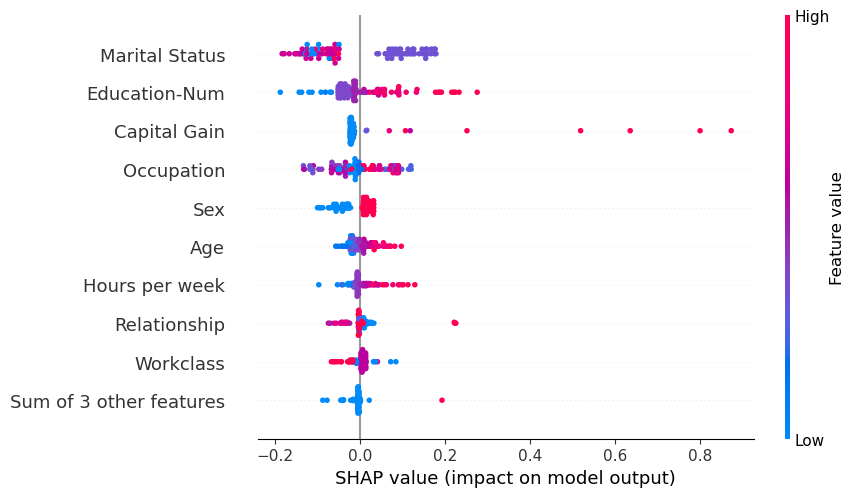

In [43]:
class_index=1
shap.plots.beeswarm(shap_values[:,:,class_index])